In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, f1_score
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [457]:
#Importing the data 
housing = pd.read_csv('/Users/jillienchu/Downloads/Nashville_housing_data_2013_2016.csv')
housing 

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,56631,56631,093 13 0B 274.00,RESIDENTIAL CONDO,320 11TH AVE S,274.0,NASHVILLE,2016-10-06,210000,20161007-0106599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56632,56632,56632,093 13 0D 044.00,RESIDENTIAL CONDO,700 12TH AVE S,608.0,NASHVILLE,2016-10-25,338000,20161101-0115186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56633,56633,56633,093 13 0D 048.00,RESIDENTIAL CONDO,700 12TH AVE S,613.0,NASHVILLE,2016-10-04,742000,20161010-0106889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56634,56634,56634,093 13 0D 056.00,RESIDENTIAL CONDO,700 12TH AVE S,708.0,NASHVILLE,2016-10-26,320000,20161031-0114730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [458]:
housing.shape

(56636, 31)

In [459]:
#Checking all the column names 
housing.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID', 'Land Use',
       'Property Address', 'Suite/ Condo   #', 'Property City', 'Sale Date',
       'Sale Price', 'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Owner Name', 'Address', 'City',
       'State', 'Acreage', 'Tax District', 'Neighborhood', 'image',
       'Land Value', 'Building Value', 'Total Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath'],
      dtype='object')

In [460]:
#Checking the data type  
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         56636 non-null  int64  
 1   Unnamed: 0.1                       56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

In [461]:
housing.isnull().sum()

Unnamed: 0                               0
Unnamed: 0.1                             0
Parcel ID                                0
Land Use                                 0
Property Address                       159
Suite/ Condo   #                     50527
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Address                              30619
City                                 30619
State                                30619
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
image                                31301
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Ar

<AxesSubplot:>

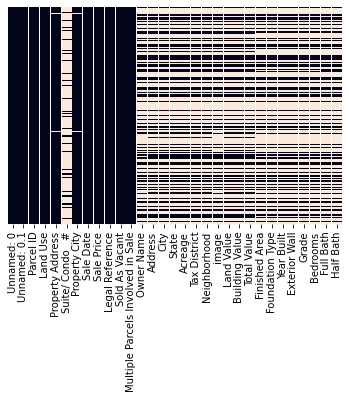

In [462]:
#heatmap for visualizing the null vaues
sns.heatmap(housing.isnull(),yticklabels = False,cbar = False)

In [463]:
#Checkimng the basic statitics of the data 
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,56636.0,28317.500000,16349.549260,0.00,14158.75,28317.50,42476.25,56635.00
Unnamed: 0.1,56636.0,28317.500000,16349.549260,0.00,14158.75,28317.50,42476.25,56635.00
Sale Price,56636.0,327211.128911,928742.546637,50.00,135000.00,205450.00,329000.00,54278060.00
Acreage,26017.0,0.498903,1.570396,0.01,0.18,0.27,0.45,160.06
Neighborhood,26017.0,4356.215782,2170.348270,107.00,3126.00,3929.00,6228.00,9530.00
Land Value,26017.0,69072.665027,106040.533131,100.00,21000.00,28800.00,60000.00,2772000.00
Building Value,26017.0,160802.458969,206804.058426,0.00,75900.00,111400.00,180700.00,12971800.00
Total Value,26017.0,232397.094246,281070.266610,100.00,102800.00,148500.00,268500.00,13940400.00
Finished Area,24166.0,1926.954345,1687.017313,0.00,1239.00,1632.00,2212.00,197988.00
Year Built,24165.0,1963.749224,26.546141,1799.00,1948.00,1960.00,1983.00,2017.00


In [464]:
housing.Grade.value_counts()

C       17262
B        3698
D        1984
A         598
X         523
E          60
TCC        20
AAB         3
IDC         3
AAC         3
OFC         2
TCD         1
SRD         1
SSC         1
SRC         1
OMB         1
TFC         1
TCB         1
TAC         1
OFB         1
Name: Grade, dtype: int64

In [465]:
#Checking unique values in the variable city 
housing.City.value_counts()

NASHVILLE         20703
ANTIOCH            1311
MADISON            1309
HERMITAGE          1055
OLD HICKORY         919
GOODLETTSVILLE      472
BRENTWOOD           203
WHITES CREEK         24
JOELTON              11
MOUNT JULIET          8
BELLEVUE              1
NOLENSVILLE           1
Name: City, dtype: int64

<AxesSubplot:>

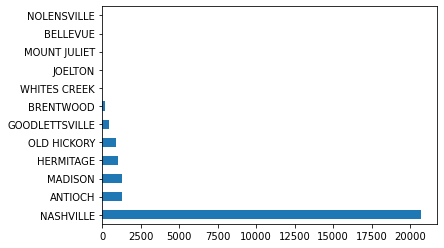

In [466]:
housing['City'].value_counts().plot(kind='barh')

In [467]:
housing['Property City'].value_counts()

NASHVILLE         40280
ANTIOCH            6316
HERMITAGE          3133
MADISON            2114
BRENTWOOD          1696
OLD HICKORY        1415
GOODLETTSVILLE      735
NOLENSVILLE         494
MOUNT JULIET        183
WHITES CREEK         97
JOELTON              11
BELLEVUE              1
UNKNOWN               1
FRANKLIN              1
Name: Property City, dtype: int64

In [468]:
#Converting the sale to datetime datatype and extracting the year and month 
housing['Sale Date']= pd.to_datetime(housing['Sale Date']) 

In [469]:
housing.dtypes

Unnamed: 0                                    int64
Unnamed: 0.1                                  int64
Parcel ID                                    object
Land Use                                     object
Property Address                             object
Suite/ Condo   #                             object
Property City                                object
Sale Date                            datetime64[ns]
Sale Price                                    int64
Legal Reference                              object
Sold As Vacant                               object
Multiple Parcels Involved in Sale            object
Owner Name                                   object
Address                                      object
City                                         object
State                                        object
Acreage                                     float64
Tax District                                 object
Neighborhood                                float64
image       

In [470]:
#Extracting the sale year, month and day 

housing['Sale Year'] = housing['Sale Date'].dt.year
housing[['Sale Date','Sale Year']].head()

housing['Sale Month'] = housing['Sale Date'].dt.month
housing[['Sale Date','Sale Month']].head()

housing['Sale Day'] = housing['Sale Date'].dt.day
housing[['Sale Date','Sale Day']].head()

,Sale Date,Sale Day
0,2013-01-24,24
1,2013-01-11,11
2,2013-01-18,18
3,2013-01-18,18
4,2013-01-23,23


In [471]:
housing.head()

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month,Sale Day
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,24
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,2013,1,11
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,2013,1,18
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,2013,1,18
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,2013,1,23


<AxesSubplot:>

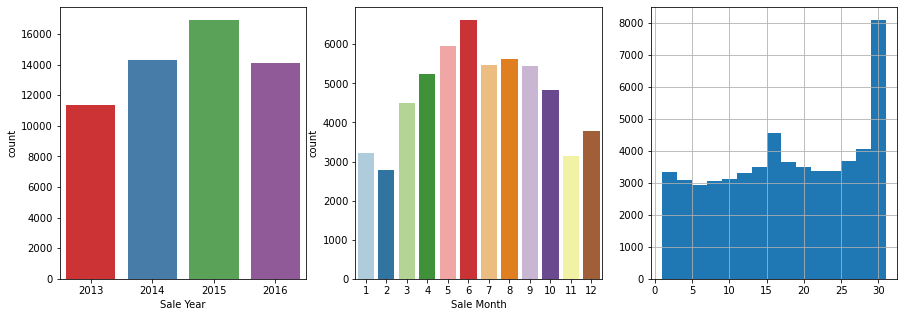

In [472]:
#visualizing the data
fig, (a, b, c) = plt.subplots(1,3, figsize=(15,5))
sns.countplot(x='Sale Year', data=housing, palette="Set1", ax = a)
sns.countplot(x='Sale Month', data=housing,palette="Paired", ax = b)
housing['Sale Day'].hist(bins = 15, ax= c)

<AxesSubplot:>

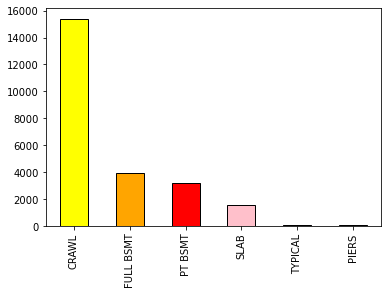

In [473]:
housing['Foundation Type'].value_counts().plot(kind="bar", align='center',color = ['yellow', 'orange', 'red', 'pink', 'purple','white'],edgecolor = 'black')

In [474]:
housing['Foundation Type'].isnull().sum()

32472

In [475]:
housing['City'].value_counts()

NASHVILLE         20703
ANTIOCH            1311
MADISON            1309
HERMITAGE          1055
OLD HICKORY         919
GOODLETTSVILLE      472
BRENTWOOD           203
WHITES CREEK         24
JOELTON              11
MOUNT JULIET          8
BELLEVUE              1
NOLENSVILLE           1
Name: City, dtype: int64

<AxesSubplot:>

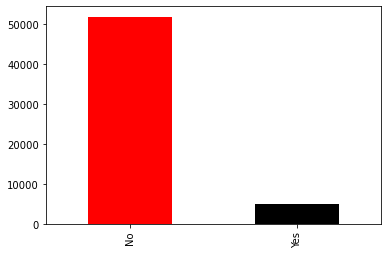

In [476]:
housing['Sold As Vacant'].value_counts().plot(kind='bar', color = ['red', 'black'])

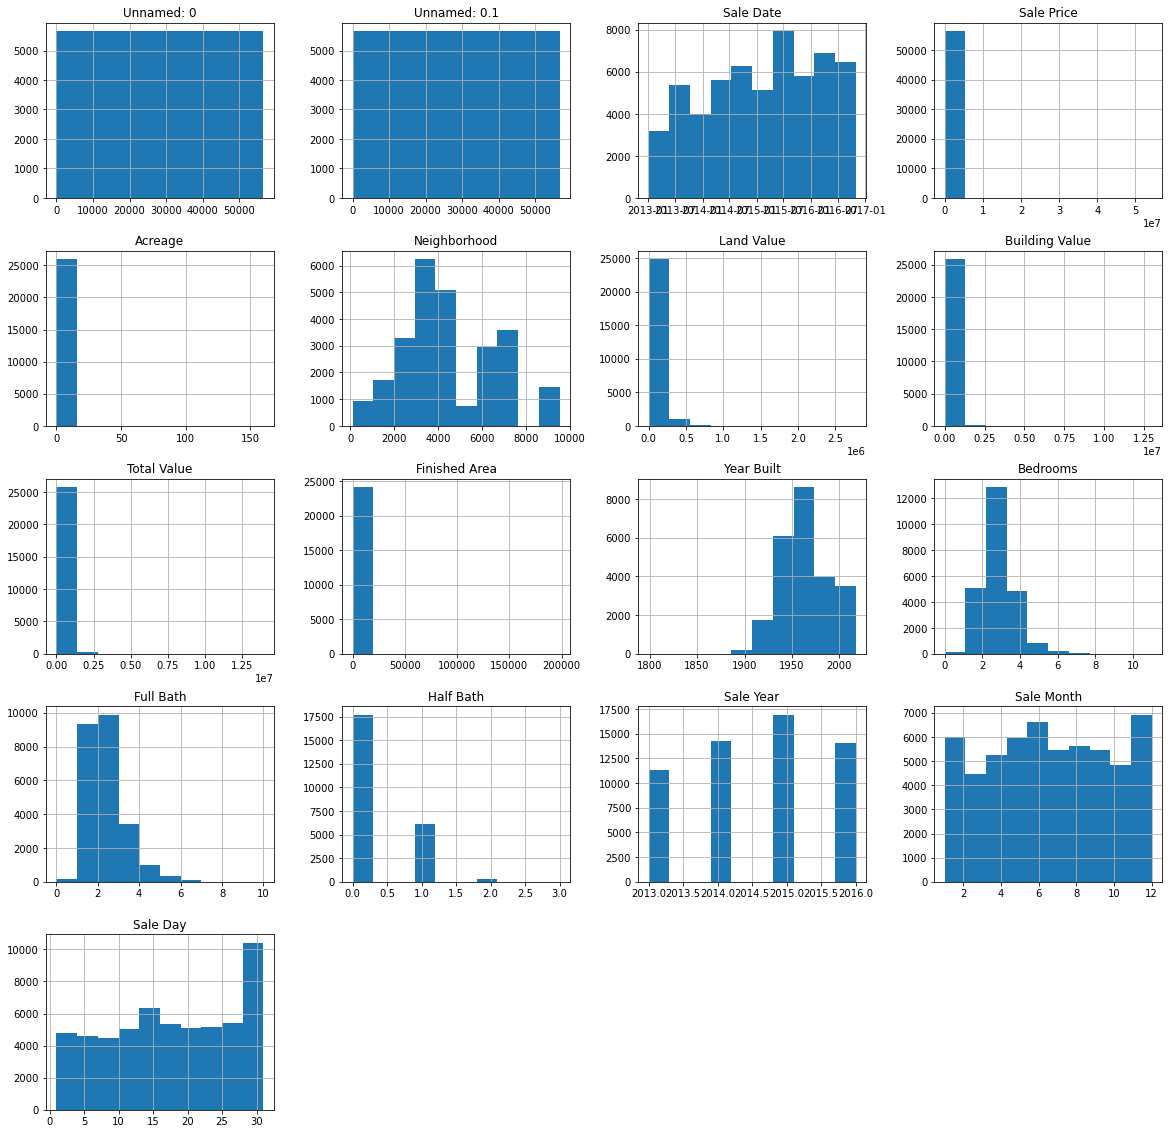

In [477]:
housing.hist(figsize=(20,20),bins=10)
plt.show()

Text(0.5, 1.0, 'hbath')

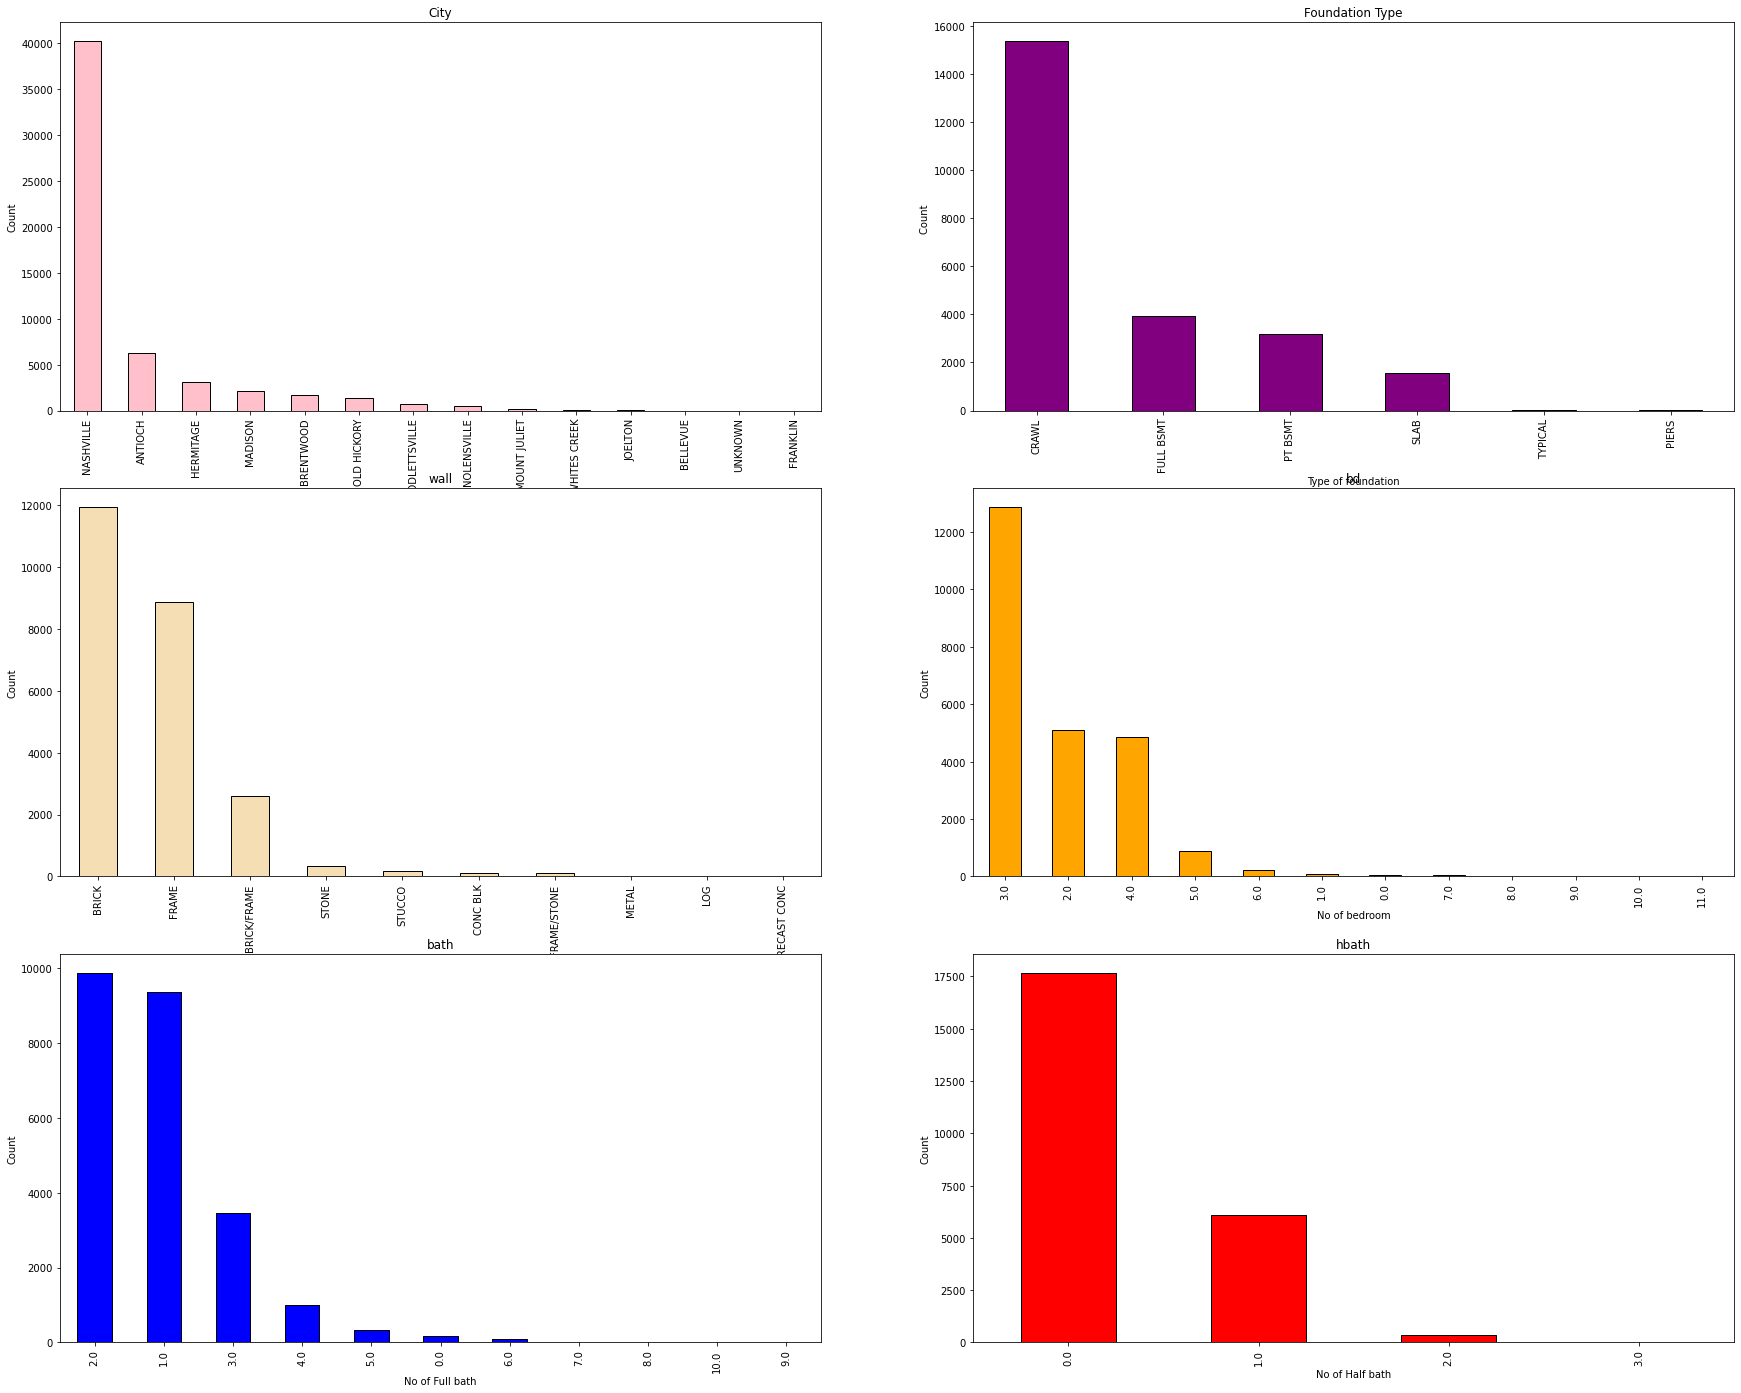

In [478]:
plt.figure(figsize=(30,50))

plt.subplot(6,2,1)
housing['Property City'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel("Property City")
plt.ylabel("Count")
plt.title("City")


plt.subplot(6,2,2)
housing['Foundation Type'].value_counts().plot(kind="bar", align='center',color = 'purple',edgecolor = 'black')
plt.xlabel('Type of foundation')
plt.ylabel('Count ')
plt.title('Foundation Type')


plt.subplot(6,2,3)
housing['Exterior Wall'].value_counts().plot(kind="bar", align='center',color = 'wheat',edgecolor = 'black')
plt.xlabel('Type of walls')
plt.ylabel('Count')
plt.title('wall')


plt.subplot(6,2,4)
housing['Bedrooms'].value_counts().plot(kind="bar", align='center',color = 'orange',edgecolor = 'black')
plt.xlabel('No of bedroom')
plt.ylabel('Count')
plt.title("bd")


plt.subplot(6,2,5)
housing['Full Bath'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel('No of Full bath')
plt.ylabel('Count')
plt.title("bath")


plt.subplot(6,2,6)
housing['Half Bath'].value_counts().plot(kind="bar", align='center',color = 'red',edgecolor = 'black')
plt.xlabel('No of Half bath')
plt.ylabel('Count')
plt.title("hbath")

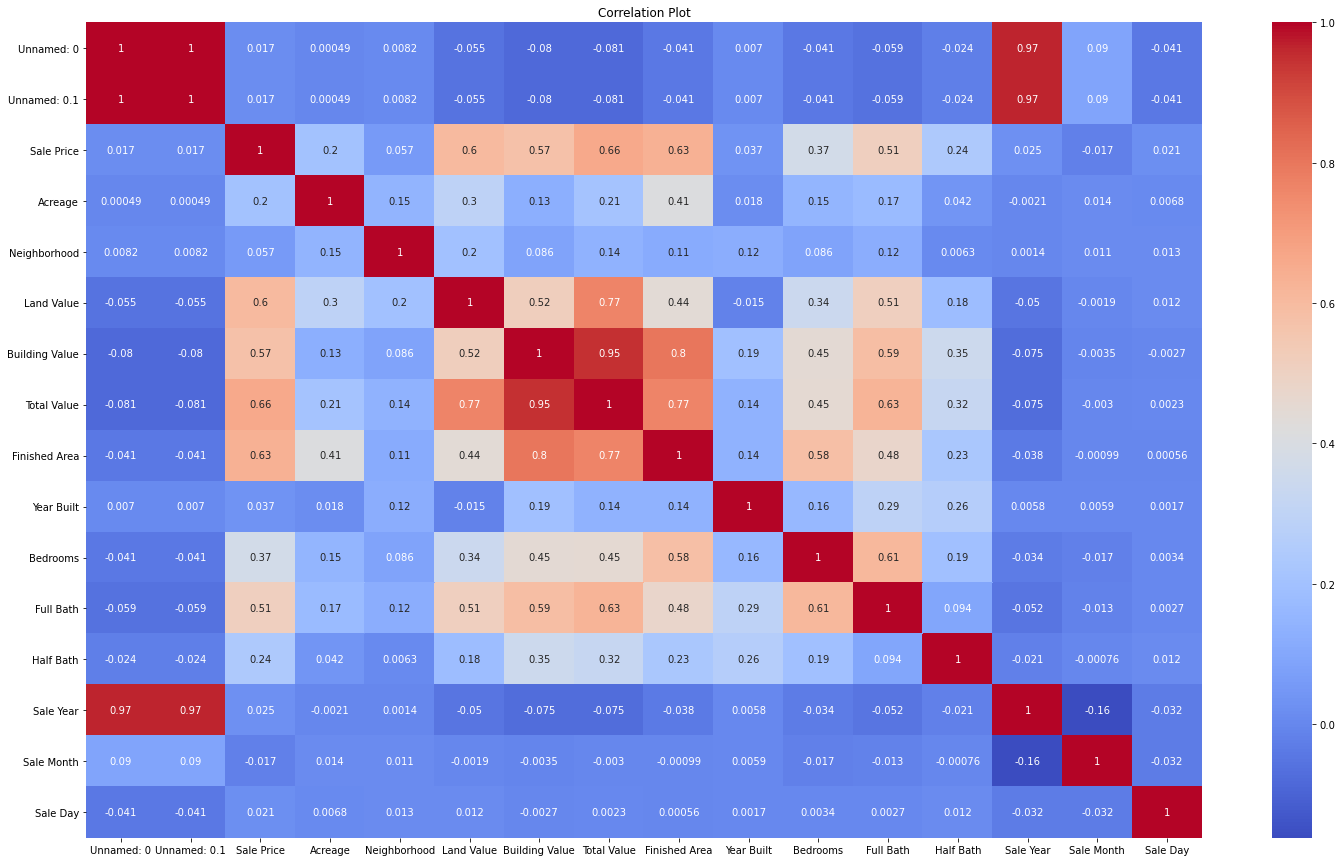

In [479]:
plt.figure(figsize = (25,15))
sns.heatmap(housing.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Plot')
plt.show()

In [480]:
# Dropping irrelavent columns
housing.drop(['Unnamed: 0.1', 'Unnamed: 0','Parcel ID','Suite/ Condo   #','Property City','Property Address','Legal Reference','Owner Name','Address','City','State','Neighborhood','image'], axis = 1, inplace=True)
housing.head()

,Land Use,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Land Value,Building Value,Total Value,...,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month,Sale Day
0,RESIDENTIAL CONDO,2013-01-24,132000,No,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,24
1,SINGLE FAMILY,2013-01-11,191500,No,No,0.17,URBAN SERVICES DISTRICT,32000.0,134400.0,168300.0,...,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,2013,1,11
2,SINGLE FAMILY,2013-01-18,202000,No,No,0.11,CITY OF BERRY HILL,34000.0,157800.0,191800.0,...,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,2013,1,18
3,SINGLE FAMILY,2013-01-18,32000,No,No,0.17,URBAN SERVICES DISTRICT,25000.0,243700.0,268700.0,...,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,2013,1,18
4,SINGLE FAMILY,2013-01-23,102000,No,No,0.34,URBAN SERVICES DISTRICT,25000.0,138100.0,164800.0,...,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,2013,1,23


In [481]:
housing['Land Use'].value_counts()

SINGLE FAMILY                                 34268
RESIDENTIAL CONDO                             14081
VACANT RESIDENTIAL LAND                        3586
VACANT RES LAND                                1575
DUPLEX                                         1389
ZERO LOT LINE                                  1049
CONDO                                           252
RESIDENTIAL COMBO/MISC                           95
TRIPLEX                                          92
QUADPLEX                                         39
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CHURCH                                           34
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         19
SPLIT CLASS                                      17
VACANT COMMERCIAL LAND                           17
PARKING LOT                                      11
GREENBELT                                        10
FOREST                                           10
PARSONAGE   

In [482]:
housing['Land Use'] = housing['Land Use'].replace(['SINGLE FAMILY','RESIDENTIAL CONDO','VACANT RESIDENTIAL LAND','VACANT RES LAND','DUPLEX','ZERO LOT LINE','CONDO','RESIDENTIAL COMBO/MISC','TRIPLEX','QUADPLEX','MOBILE HOME','DORMITORY/BOARDING HOUSE','SPLIT CLASS','PARSONAGE','VACANT RESIENTIAL LAND','GREENBELT/RES\r\nGRRENBELT/RES','APARTMENT: LOW RISE (BUILT SINCE 1960)','VACANT ZONED MULTI FAMILY'],'RESIDENTIAL')


housing['Land Use'] = housing['Land Use'].replace(['VACANT COMMERCIAL LAND','PARKING LOT','DAY CARE CENTER','TERMINAL/DISTRIBUTION WAREHOUSE','RESTURANT/CAFETERIA','OFFICE BLDG (ONE OR TWO STORIES)','LIGHT MANUFACTURING','ONE STORY GENERAL RETAIL STORE','CLUB/UNION HALL/LODGE','CONVENIENCE MARKET WITHOUT GAS','SMALL SERVICE SHOP','STRIP SHOPPING CENTER','METRO OTHER THAN OFC, SCHOOL,HOSP, OR PARK','NIGHTCLUB/LOUNGE'],'COMMERCIAL')


housing['Land Use'] = housing['Land Use'].replace(['CONDOMINIUM OFC  OR OTHER COM CONDO','CHURCH','FOREST','GREENBELT','NON-PROFIT CHARITABLE SERVICE','VACANT RURAL LAND','MORTUARY/CEMETERY'],'MISCELLANEOUS')



In [483]:
housing['Land Use'].value_counts()

RESIDENTIAL      56498
MISCELLANEOUS       94
COMMERCIAL          44
Name: Land Use, dtype: int64

In [484]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Land Use                           56636 non-null  object        
 1   Sale Date                          56636 non-null  datetime64[ns]
 2   Sale Price                         56636 non-null  int64         
 3   Sold As Vacant                     56636 non-null  object        
 4   Multiple Parcels Involved in Sale  56636 non-null  object        
 5   Acreage                            26017 non-null  float64       
 6   Tax District                       26017 non-null  object        
 7   Land Value                         26017 non-null  float64       
 8   Building Value                     26017 non-null  float64       
 9   Total Value                        26017 non-null  float64       
 10  Finished Area                     

In [485]:
housing.isnull().sum()

Land Use                                 0
Sale Date                                0
Sale Price                               0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Acreage                              30619
Tax District                         30619
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Area                        32470
Foundation Type                      32472
Year Built                           32471
Exterior Wall                        32471
Grade                                32471
Bedrooms                             32477
Full Bath                            32359
Half Bath                            32490
Sale Year                                0
Sale Month                               0
Sale Day                                 0
dtype: int64

In [486]:
#Dropping irrelavant variables
housing = housing.drop(columns=['Sale Date'])
housing = housing.drop(columns=['Multiple Parcels Involved in Sale'])

In [487]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(housing["Sold As Vacant"])
 
# printing label
label

array([0, 0, 0, ..., 0, 0, 0])

In [488]:
housing.drop("Sold As Vacant", axis=1, inplace=True)
 
# Appending the array to our dataFrame
housing["Sold As Vacant"] = label
 
# printing Dataframe
housing

,Land Use,Sale Price,Acreage,Tax District,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month,Sale Day,Sold As Vacant
0,RESIDENTIAL,132000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,24,0
1,RESIDENTIAL,191500,0.17,URBAN SERVICES DISTRICT,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,2013,1,11,0
2,RESIDENTIAL,202000,0.11,CITY OF BERRY HILL,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,2013,1,18,0
3,RESIDENTIAL,32000,0.17,URBAN SERVICES DISTRICT,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,2013,1,18,0
4,RESIDENTIAL,102000,0.34,URBAN SERVICES DISTRICT,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,2013,1,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,RESIDENTIAL,210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,6,0
56632,RESIDENTIAL,338000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,25,0
56633,RESIDENTIAL,742000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,4,0
56634,RESIDENTIAL,320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,26,0


In [489]:
label = le.fit_transform(housing["Land Use"])
 
housing.drop("Land Use", axis=1, inplace=True)
 
# Appending the array to our dataFrame
housing["Land Use"] = label
 
# printing Dataframe
housing

,Sale Price,Acreage,Tax District,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month,Sale Day,Sold As Vacant,Land Use
0,132000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,24,0,2
1,191500,0.17,URBAN SERVICES DISTRICT,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,2013,1,11,0,2
2,202000,0.11,CITY OF BERRY HILL,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,2013,1,18,0,2
3,32000,0.17,URBAN SERVICES DISTRICT,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,2013,1,18,0,2
4,102000,0.34,URBAN SERVICES DISTRICT,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,2013,1,23,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,6,0,2
56632,338000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,25,0,2
56633,742000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,4,0,2
56634,320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,26,0,2


In [490]:
label = le.fit_transform(housing["Tax District"])
 
housing.drop("Tax District", axis=1, inplace=True)
 
# Appending the array to our dataFrame
housing["Tax District"] = label
 
# printing Dataframe
housing

,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month,Sale Day,Sold As Vacant,Land Use,Tax District
0,132000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,24,0,2,7
1,191500,0.17,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,2013,1,11,0,2,6
2,202000,0.11,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,2013,1,18,0,2,1
3,32000,0.17,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,2013,1,18,0,2,6
4,102000,0.34,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,2013,1,23,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,6,0,2,7
56632,338000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,25,0,2,7
56633,742000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,4,0,2,7
56634,320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,26,0,2,7


In [491]:
label = le.fit_transform(housing["Foundation Type"])
 
housing.drop("Foundation Type", axis=1, inplace=True)
 
# Appending the array to our dataFrame
housing["Foundation Type"] = label
 
# printing Dataframe
housing

,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month,Sale Day,Sold As Vacant,Land Use,Tax District,Foundation Type
0,132000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,24,0,2,7,6
1,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,BRICK,C,2.0,1.0,0.0,2013,1,11,0,2,6,3
2,202000,0.11,34000.0,157800.0,191800.0,2090.82495,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,2013,1,18,0,2,1,4
3,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,2013,1,18,0,2,6,1
4,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,FRAME,C,2.0,1.0,0.0,2013,1,23,0,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,6,0,2,7,6
56632,338000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,25,0,2,7,6
56633,742000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,4,0,2,7,6
56634,320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,26,0,2,7,6


In [492]:
label = le.fit_transform(housing["Exterior Wall"])
 
housing.drop("Exterior Wall", axis=1, inplace=True)
 
# Appending the array to our dataFrame
housing["Exterior Wall"] = label
 
# printing Dataframe
housing

,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Grade,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month,Sale Day,Sold As Vacant,Land Use,Tax District,Foundation Type,Exterior Wall
0,132000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,24,0,2,7,6,10
1,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,C,2.0,1.0,0.0,2013,1,11,0,2,6,3,0
2,202000,0.11,34000.0,157800.0,191800.0,2090.82495,2000.0,C,3.0,2.0,1.0,2013,1,18,0,2,1,4,1
3,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,B,4.0,2.0,0.0,2013,1,18,0,2,6,1,1
4,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,C,2.0,1.0,0.0,2013,1,23,0,2,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,6,0,2,7,6,10
56632,338000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,25,0,2,7,6,10
56633,742000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,4,0,2,7,6,10
56634,320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,26,0,2,7,6,10


In [493]:
label = le.fit_transform(housing["Grade"])
 
housing.drop("Grade", axis=1, inplace=True)
 
# Appending the array to our dataFrame
housing["Grade"] = label
 
# printing Dataframe
housing

,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month,Sale Day,Sold As Vacant,Land Use,Tax District,Foundation Type,Exterior Wall,Grade
0,132000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,24,0,2,7,6,10,20
1,191500,0.17,32000.0,134400.0,168300.0,1149.00000,1941.0,2.0,1.0,0.0,2013,1,11,0,2,6,3,0,4
2,202000,0.11,34000.0,157800.0,191800.0,2090.82495,2000.0,3.0,2.0,1.0,2013,1,18,0,2,1,4,1,4
3,32000,0.17,25000.0,243700.0,268700.0,2145.60001,1948.0,4.0,2.0,0.0,2013,1,18,0,2,6,1,1,3
4,102000,0.34,25000.0,138100.0,164800.0,1969.00000,1910.0,2.0,1.0,0.0,2013,1,23,0,2,6,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,6,0,2,7,6,10,20
56632,338000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,25,0,2,7,6,10,20
56633,742000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,4,0,2,7,6,10,20
56634,320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,10,26,0,2,7,6,10,20


In [494]:
#Scaling the data before utilizing nearest neighbor imputation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
housing = pd.DataFrame(scaler.fit_transform(housing), columns = housing.columns)
housing.head()

,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month,Sale Day,Sold As Vacant,Land Use,Tax District,Foundation Type,Exterior Wall,Grade
0,0.002431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.766667,0.0,1.0,1.000000,1.000000,1.0,1.00
1,0.003527,0.001000,0.011508,0.010361,0.012066,0.005803,0.651376,0.181818,0.1,0.000000,0.0,0.0,0.333333,0.0,1.0,0.857143,0.500000,0.0,0.20
2,0.003721,0.000625,0.012230,0.012165,0.013751,0.010560,0.922018,0.272727,0.2,0.333333,0.0,0.0,0.566667,0.0,1.0,0.142857,0.666667,0.1,0.20
3,0.000589,0.001000,0.008983,0.018787,0.019268,0.010837,0.683486,0.363636,0.2,0.000000,0.0,0.0,0.566667,0.0,1.0,0.857143,0.166667,0.1,0.15
4,0.001878,0.002062,0.008983,0.010646,0.011815,0.009945,0.509174,0.181818,0.1,0.000000,0.0,0.0,0.733333,0.0,1.0,0.857143,0.000000,0.3,0.20


In [495]:
#imputing the missing data
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 7)
housing = pd.DataFrame(imputer.fit_transform(housing), columns = housing.columns)

In [496]:
#checking for missing values
housing.isnull().sum()

Sale Price         0
Acreage            0
Land Value         0
Building Value     0
Total Value        0
Finished Area      0
Year Built         0
Bedrooms           0
Full Bath          0
Half Bath          0
Sale Year          0
Sale Month         0
Sale Day           0
Sold As Vacant     0
Land Use           0
Tax District       0
Foundation Type    0
Exterior Wall      0
Grade              0
dtype: int64

In [497]:
housing.loc[housing['Sale Price'] - housing['Total Value'] < 0, 'Sale Price - Total Value'] = 0
housing.loc[housing['Sale Price'] - housing['Total Value'] > 0, 'Sale Price - Total Value'] = 1

# housing['Sale Price - Total Value'] = 1 if housing['Sale Price'] - housing['Total Value'] > 0 else 0

In [498]:
housing.head()

,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month,Sale Day,Sold As Vacant,Land Use,Tax District,Foundation Type,Exterior Wall,Grade,Sale Price - Total Value
0,0.002431,0.001000,0.009375,0.000000,0.001864,0.027234,0.763434,0.324675,0.285714,0.333333,0.0,0.0,0.766667,0.0,1.0,1.000000,1.000000,1.0,1.00,1.0
1,0.003527,0.001000,0.011508,0.010361,0.012066,0.005803,0.651376,0.181818,0.100000,0.000000,0.0,0.0,0.333333,0.0,1.0,0.857143,0.500000,0.0,0.20,0.0
2,0.003721,0.000625,0.012230,0.012165,0.013751,0.010560,0.922018,0.272727,0.200000,0.333333,0.0,0.0,0.566667,0.0,1.0,0.142857,0.666667,0.1,0.20,0.0
3,0.000589,0.001000,0.008983,0.018787,0.019268,0.010837,0.683486,0.363636,0.200000,0.000000,0.0,0.0,0.566667,0.0,1.0,0.857143,0.166667,0.1,0.15,0.0
4,0.001878,0.002062,0.008983,0.010646,0.011815,0.009945,0.509174,0.181818,0.100000,0.000000,0.0,0.0,0.733333,0.0,1.0,0.857143,0.000000,0.3,0.20,0.0


# Logistic Regression Model

In [540]:
X = housing.drop('Sale Price - Total Value', axis=1)
y = housing['Sale Price - Total Value']

#Spliting the data into (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [541]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [542]:
logreg = LogisticRegression()
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression()

In [543]:
model_log.score(X_train, y_train)

0.9925399487949148

In [544]:
#Predicting
y_pred = model_log.predict(X_test)
accuracy_score(y_test, y_pred)

0.993555790960452

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      7411
         1.0       0.99      0.99      0.99      3917

    accuracy                           0.99     11328
   macro avg       0.99      0.99      0.99     11328
weighted avg       0.99      0.99      0.99     11328

0.9907089219803997


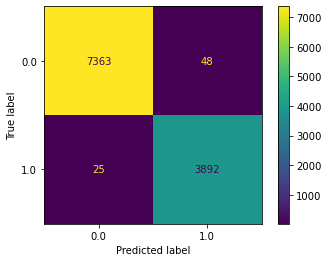

In [545]:
plot_confusion_matrix(model_log, X_test, y_test)

print(classification_report(y_test, model_log.predict(X_test)))
print(f1_score(y_test, model_log.predict(X_test)))

In [546]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.993555790960452
Precision: 0.9878172588832488
Recall: 0.993617564462599


# Decision Tree Model

In [547]:
treemodel = DecisionTreeClassifier(max_depth = 4)
treemodel.fit(X_train,y_train)

# predicting values
y_pred = treemodel.predict(X_test)

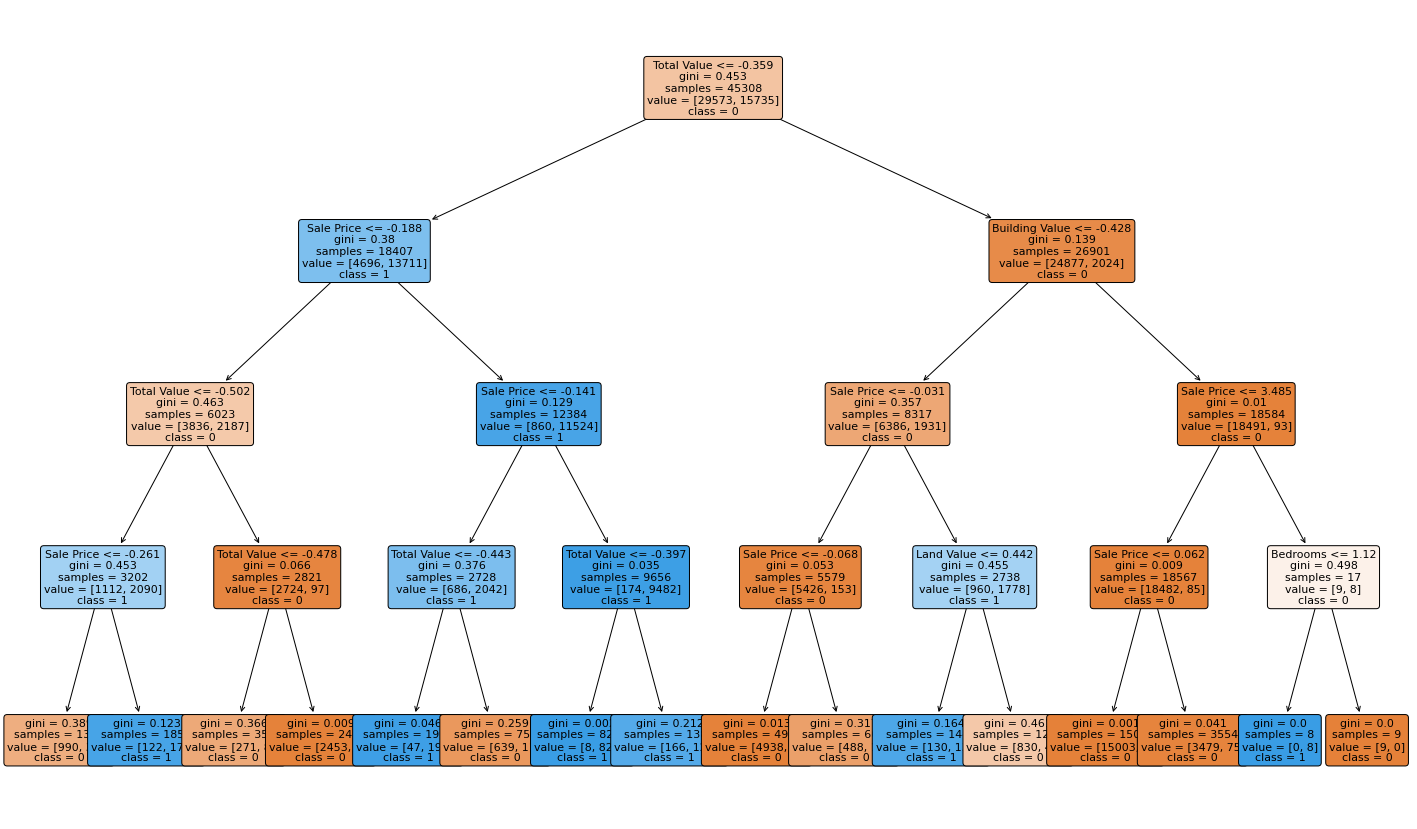

In [548]:
plt.figure(figsize = (25,15))
plot = tree.plot_tree(treemodel, feature_names = X.columns.values.tolist(), class_names = ['0', '1'], filled = True, rounded = True, fontsize = 11)

Text(51.0, 0.5, 'Truth')

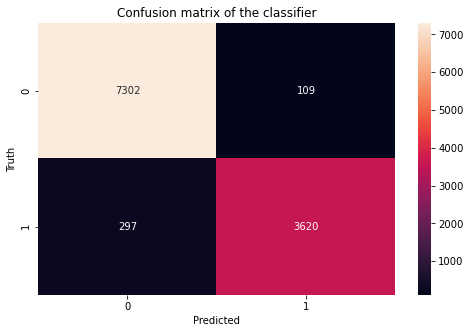

In [549]:
conf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf, annot=True, fmt = "d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [550]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      7411
         1.0       0.97      0.92      0.95      3917

    accuracy                           0.96     11328
   macro avg       0.97      0.95      0.96     11328
weighted avg       0.96      0.96      0.96     11328



In [551]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.964159604519774
Precision: 0.970769643336015
Recall: 0.9241766658156753


# Random Forest Model

In [552]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

Text(51.0, 0.5, 'Truth')

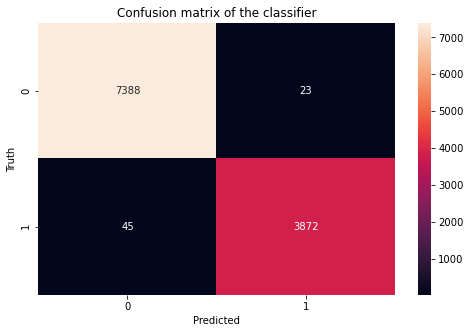

In [553]:
conf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf, annot=True, fmt = "d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [554]:
print(classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      7411
         1.0       0.99      0.99      0.99      3917

    accuracy                           0.99     11328
   macro avg       0.99      0.99      0.99     11328
weighted avg       0.99      0.99      0.99     11328

Accuracy: 0.993997175141243
Precision: 0.9940949935815148
Recall: 0.9885116160326781


# Gradient Boost Model

In [555]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.2)
g_fit = gradient_booster.fit(X_train,y_train)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7411
         1.0       1.00      0.99      0.99      3917

    accuracy                           1.00     11328
   macro avg       1.00      1.00      1.00     11328
weighted avg       1.00      1.00      1.00     11328

0.9946332737030411


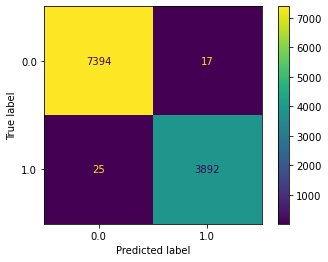

In [556]:
plot_confusion_matrix(g_fit, X_test, y_test)

print(classification_report(y_test, g_fit.predict(X_test)))
print(f1_score(y_test, g_fit.predict(X_test)))

In [557]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.993997175141243
Precision: 0.9940949935815148
Recall: 0.9885116160326781


# Neural Network Model

In [558]:
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network

#Building the neural network model
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)
#Fitting the model
model.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [559]:
predictions = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_test, predictions))

Accuracy: 99.66
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7411
         1.0       1.00      0.99      1.00      3917

    accuracy                           1.00     11328
   macro avg       1.00      1.00      1.00     11328
weighted avg       1.00      1.00      1.00     11328

Confusion Matrix:
[[7394   17]
 [  21 3896]]
